# Analyzing a Marketing Campaign 
In this project i will translate common business questions into measurable outcomes, including "How did this marketing campaign perform?", "Which channel is referring the most subscribers?", "Why is a particular channel underperforming?" and more using a Marketing dataset based on the data of an online subscription business. In this project i am going to use Python and Pandas fundamentals, such as merging/slicing datasets, groupby(), correcting data types and visualizing results using matplotlib
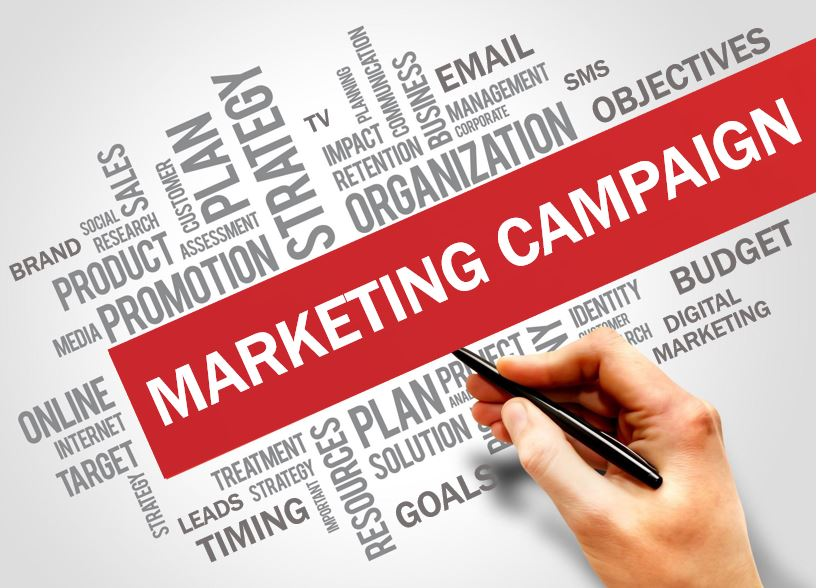

In [1]:
#import pandas into the environment
import pandas as pd

#import Marketing Dataset
marketing = pd.read_csv('D:\Analyzing Marketing Campaigns with Pandas\marketing.csv')

# Phase 1 Introduction to Pandas for Marketing

# 1.1 Examining the Data
Now that i have imported the data, i will examine it to ensure its validity. Ensuring the validity of the dataset should always be the first step you take when beginning the analysis on a new dataset. 

In [2]:
#Print the first five rows of the DataFrame
print(marketing.head()) 

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [3]:
#Print the Statistics of all Columns
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [4]:
#Check column data types and non missing values
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


# 1.2 Updating the data type of a Column
You will often want to modify the data type of columns to suit your needs. Pandas and Python have special functionalities around manipulating data types that can make your analysis easier, such as concatenating strings and summing boolean values. In this step i will modify the data type of "is_retained" column.

In [5]:
#Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [6]:
#Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

#Check the datatype of is_retained again
print(marketing['is_retained'].dtype)

bool


# 1.3 Adding new Columns
Adding new columns that derive information from existing data or based on domain knowledge is knows as Feature Engineering. Even in simple data sets, there are always new characteristics you could pull out to create a more indepth analysis. 

In this step i am going to add two new columns to marketing dataset. 
1. channel_code - which maps the values in the 'subscribing_channel' column to a numeric scale
2. is_correct_lang - conveys whether the ad was shown to the user in their preferred language

In [7]:
#Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5} 

#Map the Subscribing Channel to a Channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel  is_retained  channel_code  
0           NaN           House Ads         True         

In [8]:
#Import numpy
import numpy as np

#Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel  is_retained  channel_code is_correct_lang  
0           NaN           House Ads      

# 1.4 Date Columns
Currently, the date columns in the marketing dataframe('date_served', 'data_subscribed', 'data_canceled') are being incorrectly read as Objects. We need to convert these columns to data columns to be able to use Python and Pandas robust date manipulation and formatting capabilities. 

In this step i will import the marketing csv with proper date columns and create a new day of the week('DoW') column. 

In [9]:
#Import marketing dataset with date columns
marketing = pd.read_csv('D:\Analyzing Marketing Campaigns with Pandas\marketing.csv', parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
#marketing = marketing.drop(['Unnamed: 0'], axis = 1)

#Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5} 

#Map the Subscribing Channel to a Channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)
#print(marketing.head())

#Import numpy
import numpy as np

#Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')
#print(marketing.head())

#Add a day of the week('DoW') column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel is_retained  channel_code is_correct_lang  \
0           NaT           House Ads      

# 1.5 Daily Marketing reach by Channel
In this step i will determine how many users are seeing the marketing assets each day. This is crucial to understand how good our marketing efforts have been over the past month. 

In [10]:
#Group by date_served and count the number of Unique user_id's 
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

#Print the head of daily users
print(daily_users.head())


date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


# 1.6 Visualizing daily marketing reach
In the previous step i created a daily_users dataframe which contained number of users who subscribed each day. While this was a great first step, it is difficult interpret daily trends just by looking at the table. To make it easier i will visualize the results using line plot. 

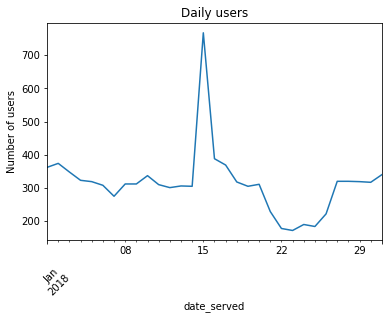

In [12]:
#Importing matplotlib for visualization
import matplotlib.pyplot as plt

#Plot daily subscribers
daily_users.plot()

#Include title and Y Axis label
plt.title('Daily users')
plt.ylabel('Number of users')

#Rotate the X axis labels by 45 degrees
plt.xticks(rotation = 45)

#Display the Plot
plt.show()

# Phase 2 Exploratory Analysis & Summary Statistics

# 2.1 Calculating Conversion Rate
In this step i will calculate the conversion rate, which is often the first metric you will want to calculate when evaluating how a marketing campaign performed. Conversion rate is one of the best ways to determine how effective a marketing team was at gaining new customers. 

The Formula for Conversion Rate is : Number of people who convert / Total number of people who we market to

In [13]:
#Calculate the number of people who we market to 
total = marketing['user_id'].nunique()
print(total)

7309


In [14]:
#Calculate the number of people who Subscribed
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
print(subscribers)

1015


In [15]:
#Calculate the Conversion rate
conversion_rate = subscribers / total 
print(round(conversion_rate * 100, 2), "%")

13.89 %


# 2.2 Calculating Retention Rate
In this step i will calculate the Retention Rate or the number of remaining subscribers from the users who converted to your product. This can give you the sense of whether your marketing campaign converted the users who are actually interested in the product. 

Conversion rate and Retention rate function hand in hand. You could create a business with a high conversion rate by giving users a free trial, but have low retention rate once users are charged for your services. 

The Formula for Retention Rate is: Number of people who remain subscribed / Total number of people who converted 

In [16]:
#Calculate the number of Subscribers
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique() 
print(total_subscribers)

1015


In [17]:
#Calculate the number of people who remained Subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()
print(retained)

678


In [18]:
#Calculate the Retention Rate
retention_rate = retained / total_subscribers
print(round(retention_rate * 100, 2), "%")

66.8 %


# 2.3 Comparing Language Conversion Rate(1)
I want to determine how effective the campaign was on converting English speakers. In this step i will isolate English speakers and calculate the conversion rate for them.

Conversion Rate Formula: Number of people who convert / Total number of people who we market to 


In [19]:
#Isolate English speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

#Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()
print(total)

7169


In [20]:
#Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()
print(subscribers)

926


In [21]:
#Calculate the Conversion rate
conversion_rate = subscribers / total
print(round(conversion_rate * 100, 2), "%")

12.92 %


# 2.4 Comparing Language Conversion Rate(2)
In this step i want to look at the Conversion Rate by language that the marketing asset was shown in. While majority of the users speak English, some prefer other language. 

I will analyze metrics by specific demographics using groupby(). This allows me to determine whether the marketing campaign was more effective in other languages.

In [22]:
#Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()
print(total)

language_displayed
Arabic       24
English    7169
German       74
Spanish     120
Name: user_id, dtype: int64


In [23]:
#Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()
print(subscribers)

language_displayed
Arabic      12
English    926
German      53
Spanish     24
Name: user_id, dtype: int64


In [24]:
#Calculate the Conversion rate for all languages
language_conversion_rate = subscribers / total 
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


# 2.5 Aggregating by Date
I would like to know if there is any difference in Conversion rate based on when in month users saw an ad.

In [25]:
#Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()
print(total.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


In [26]:
#Group by date_served and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()
print(subscribers.head())

date_served
2018-01-01    36
2018-01-02    37
2018-01-03    36
2018-01-04    35
2018-01-05    40
Name: user_id, dtype: int64


In [27]:
#Calculate the Conversion rate per day
daily_conversion_rate = subscribers / total
print(daily_conversion_rate.head())

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
Name: user_id, dtype: float64


# 2.6 Visualize Conversion Rate by Language
In this step i am going to Visualize language_conversion_rate dataframe. It is much easier to compare conversion for different languages visually. This is very critical for a Data Scientist to communicate results clearly to business stakeholders.

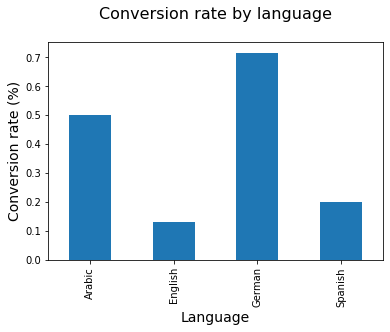

In [28]:
#Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

#Add title and X and Y axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

#Display the plot
plt.show()

# 2.7 Creating daily Conversion Rate Dataframe
To understand trends over time, i will create a dataframe that includes conversion rate for each day. Looking at the daily conversion rate is crucial to contextualize whether the converison rate for a particular day is good or bad. 

In [29]:
#Group by date_served and count Unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

#Group by date_served and calculate Subscribers
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

#Calculate the daily conversion rate for all Languages
daily_conversion_rates = subscribers / total 
print(daily_conversion_rates.head())

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
Name: user_id, dtype: float64


# 2.8 Setting up Data to Visualize Daily Conversion
Before visualizing the daily_conversion_rates series, i am going to transform the data into an easier format to use with pandas and matplotlib. 

In [30]:
#Reset the index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())
print(daily_conversion_rate.head()) 

  date_served   user_id
0  2018-01-01  0.099448
1  2018-01-02  0.098930
2  2018-01-03  0.103448
3  2018-01-04  0.108359
4  2018-01-05  0.125392


In [31]:
#Rename Columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']
print(daily_conversion_rate.head())

  date_served  conversion_rate
0  2018-01-01         0.099448
1  2018-01-02         0.098930
2  2018-01-03         0.103448
3  2018-01-04         0.108359
4  2018-01-05         0.125392


# 2.9 Visualize Daily Conversion Rate
Now that the data is in more manageable format for visualization, i will create a line chart. Creating a Line plot will make it easier to peaks and valleys in our conversion rate over time. 

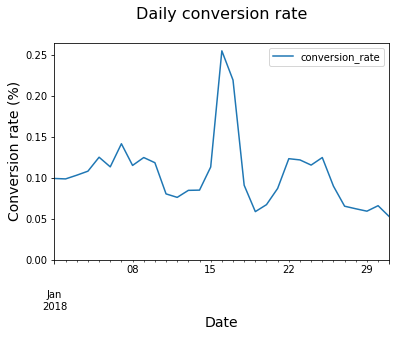

In [32]:
#Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.xlabel('Date', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

#Set Y axis to begin at 0
plt.ylim(0)

#Display the plot
plt.show()

# 2.10 Marketing Channels across Age Groups
Lets assume marketing stakeholders wants to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics. 

In this step i will create a group bar chart showing how many people each marketing channel reached by age group.


In [33]:
#Group by marketing_channel and age_group and count total users
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()
print(channel_age.head())

marketing_channel  age_group  
Email              0-18 years      93
                   19-24 years    111
                   24-30 years    120
                   30-36 years     60
                   36-45 years     63
Name: user_id, dtype: int64


In [34]:
#Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))
print(channel_age_df.head())

age_group          0-18 years  19-24 years  24-30 years  30-36 years  \
marketing_channel                                                      
Email                      93          111          120           60   
Facebook                  264          347          296          249   
House Ads                 694          761          681          699   
Instagram                 300          315          286          259   
Push                      186          145          183           86   

age_group          36-45 years  45-55 years  55+ years  
marketing_channel                                       
Email                       63           65         53  
Facebook                   226          299        179  
House Ads                  589          678        631  
Instagram                  280          227        204  
Push                       193           82        118  


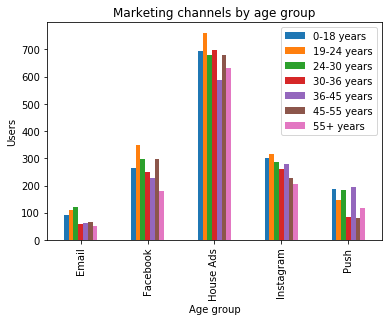

In [35]:
#Plot channel_age_df
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age group')
plt.ylabel('Users')

#Add legend to the plot
plt.legend(loc = 'upper right', labels = channel_age_df.columns.values)
plt.show()

# 2.11 Grouping and Counting by Multiple Columns
Stakeholders want to see whose channel had the best retention rate from the campaign. For this we must determing how many subscribers came from the campaign and how many of those subscribers have stayed on the service. 

It is important to identify how each marketing channel is performing. If one channel outperforms others it might signal the channel merits further investment. 

In [36]:
#Count the Subscribers by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [37]:
#Count the retained Subscribers by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


# 2.12 Analyzing Retention Rates for the Campaign
Now that i have calculated total subscribers and retained subscribers, i can settle the question of which channel had the highest retention rate. 

Lets calculate retention rates for each channel and visualize the results.

In [38]:
#Calculate Retention Rate
retention_rate = retention_subs / retention_total 
print(retention_rate.head())

date_subscribed  subscribing_channel
2018-01-01       Email                  1.0000
                 Facebook               0.8750
                 House Ads              0.6875
                 Instagram              0.7500
                 Push                   1.0000
Name: user_id, dtype: float64


In [39]:
#Unstack the retention_rate
retention_rate_df = pd.DataFrame(retention_rate.unstack(level = 1))
print(retention_rate_df.head())

subscribing_channel  Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                     
2018-01-01            1.00  0.875000   0.687500   0.750000  1.000000
2018-01-02            0.75  1.000000   0.588235   0.625000  1.000000
2018-01-03             NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04            0.50  0.666667   0.466667   0.500000       NaN
2018-01-05            1.00  0.571429   0.500000   0.636364  1.000000


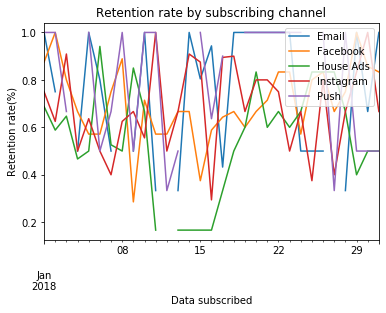

In [40]:
#Plot Retention Rate
retention_rate_df.plot()

#Add title, x and y label, legend and display the plot
plt.title('Retention rate by subscribing channel')
plt.xlabel('Data subscribed')
plt.ylabel('Retention rate(%)')
plt.legend(loc = 'upper right', labels = retention_rate_df.columns.values)
plt.show()

# Phase 3 Conversion Attribution

# 3.1 Building a Conversion Function
I have been doing a lot of repetitive calculations. Anytime you notice repetition in your work, consider automation. The more of the low variance work you can automate, the more time you will have to explore new and interesting data sciente topics at work. 

Since i know marketing dataframe is going to remain same throughout this project, i am going to build a function to calculate conversion rate across any sub segment on the fly. 

I will build a function that takes a dataframe and list of column names and outputs the conversion rate across the columns.

In [41]:
#Define a Function
def conversion_rate(dataframe, column_names):
    #Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    
    #Total number of users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    #Conversion rate
    conversion_rate = column_conv / column_total 
    
    #Fill the missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

# 3.2 Test and Visualize Conversion Function
Now its time to test the newly built Conversion Function. In this step you will see how quickly you can calculate the conversion rate, that in previous steps tooks multiple steps. 

In [42]:
#Calculate the conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


In [43]:
#Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))
print(age_group_df.head())

age_group    0-18 years  19-24 years  24-30 years  30-36 years  36-45 years  \
date_served                                                                   
2018-01-01     0.155172     0.196721     0.105263     0.040816     0.042553   
2018-01-02     0.180328     0.164384     0.114754     0.040000     0.043478   
2018-01-03     0.102041     0.208955     0.150943     0.042553     0.060000   
2018-01-04     0.117647     0.200000     0.183673     0.045455     0.043478   
2018-01-05     0.142857     0.250000     0.136364     0.090909     0.068182   

age_group    45-55 years  55+ years  
date_served                          
2018-01-01      0.022222   0.086957  
2018-01-02      0.043478   0.024390  
2018-01-03      0.047619   0.043478  
2018-01-04      0.061224   0.073171  
2018-01-05      0.046512   0.088889  


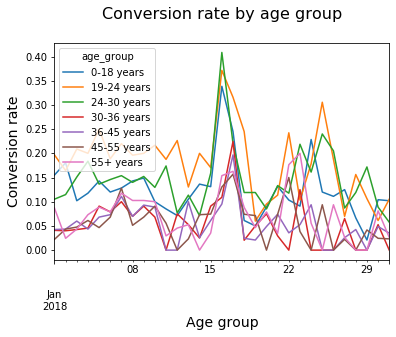

In [44]:
#Visualize Conversion by age_group
age_group_df.plot(kind = 'line')
plt.title('Conversion rate by age group\n', size = 16)
plt.xlabel('Age group', size = 14)
plt.ylabel('Conversion rate', size = 14)
plt.show()

# 3.3 Plotting Function
Now that we have looked at conversion rate by age, you want to see if that trend has changed over time. Marketing has been changing their strategy and wants to make sure their new method isnt alienating age groups that are less comfortable with their product. We need a plotting function to make is easier to visualize the results. 

In this step i will build a function to plot the results of conversion rate function. 

In [45]:
#Define a Plotting Function
def plotting_conv(dataframe):
    for column in dataframe:
        #Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', size = 16)
        plt.xlabel('Date', size = 14)
        plt.ylabel('Conversion rate', size = 14)
        
        #Show plot
        plt.show()
        plt.clf() 

# 3.4 Putting it all together
Lets assume marketing stakeholders have requested a report of daily conversion rate for each age group and they need it as soon as possible. They want to report this report on a monthly cadence. This is a perfect opportunity to utilize our functions. Not only the functions will help you to get this report out promptly today, but it will also help each month when its time for the refresh of the data. 

In this step i am going to use both conversion_rate and plotting_conv function.

C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


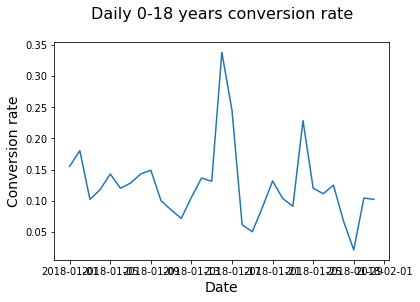

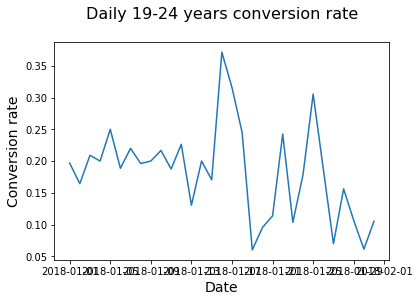

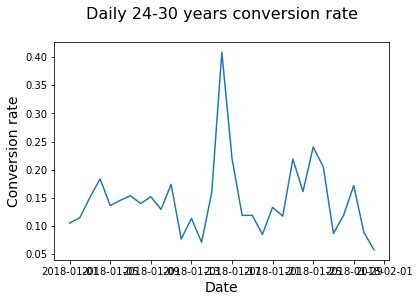

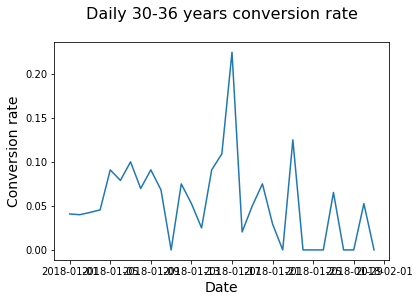

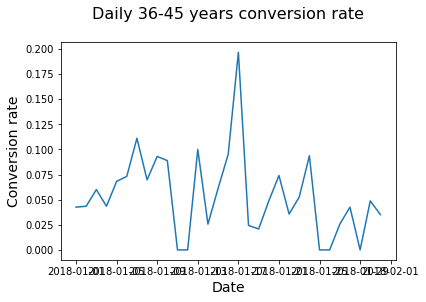

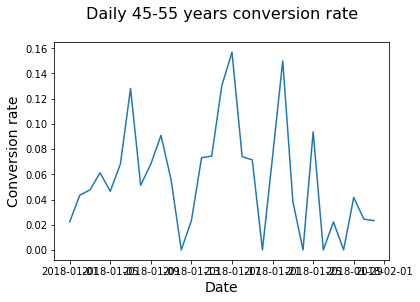

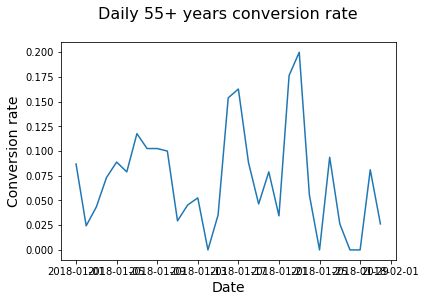

<Figure size 432x288 with 0 Axes>

In [46]:
#Calculate the conversion rate by date served and age group 
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

#Unstack the age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level =1))

#Plot the results
plotting_conv(age_group_df)

# 3.5 House ads Conversion Rate
The House ads team has become worried about some irregularities they have noticed in conversion rate. It is common for stakeholders to come to you with concerns they have noticed around changing metrics. As a Data Scientist, its our job to determine whether these changes are natural fluctuations or if they require further inspection. 

In this step i will use conversion_rate and plotting_conv functions out on marketing dataframe to look at conversion rate by date_served and marketing_channel. 

In [47]:
#Calculate Conversion rate by date served and marketing channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])
print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


In [48]:
#Unstack daily_conv_channel and convert it to a Dataframe
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))
print(daily_conv_channel.head())

marketing_channel  Email  Facebook  House Ads  Instagram      Push
date_served                                                       
2018-01-01           1.0  0.117647   0.084656   0.106667  0.083333
2018-01-02           1.0  0.098361   0.077982   0.129032  0.055556
2018-01-03           0.0  0.080645   0.088542   0.171875  0.083333
2018-01-04           0.5  0.138462   0.089820   0.126984  0.058824
2018-01-05           1.0  0.112903   0.126582   0.159420  0.027778


C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


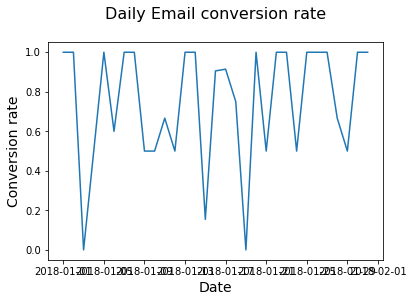

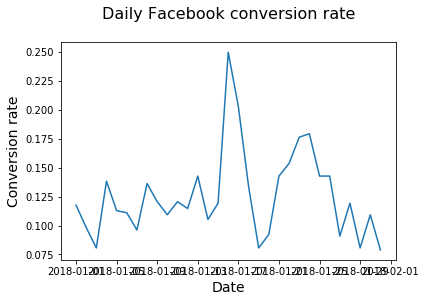

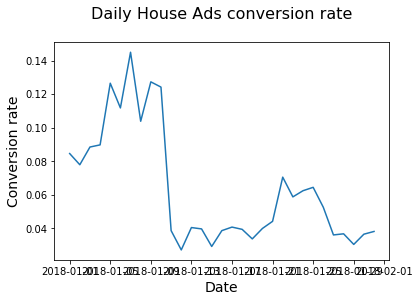

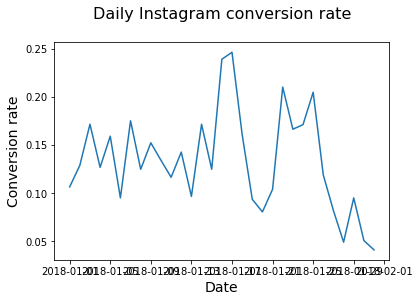

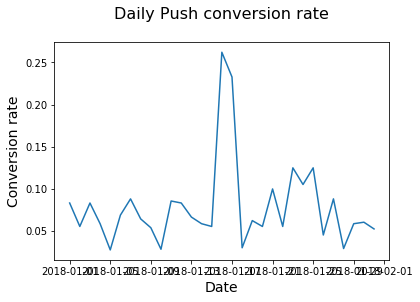

<Figure size 432x288 with 0 Axes>

In [49]:
#Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

# We can notice from the above daily House ads conversion rate plot that there is a sudden decrease in conversion rate on January 11th, 2018.

# 3.6 Analyzing House ads Conversion Rate
Lets analyse the potential cause for the sudden decrease in conversion rate. As a Data Scientist supporting a marketing team, you will run into flucuating metrics all the time. It's vital to identify if the flucuations are due to expected shifts in user behaviour (differences across the day of the week) versus a larger problem in technical implementation or marketing strategy.

In this step we will begin by checking whether the users are more likely to convert on weekends compared with weekdays and determine if that could be the cause for changing house ads conversion rate. 

In [50]:
#Add day of the week column in marketing Dataframe
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek
display(marketing.head())

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW,DoW_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0


In [51]:
#Calculate Conversion rate by day of week and marketing channel
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])
print(DoW_conversion.head())

DoW_served  marketing_channel
0.0         Email                0.162621
            Facebook             0.119601
            House Ads            0.062660
            Instagram            0.122517
            Push                 0.064516
Name: user_id, dtype: float64


In [52]:
#Unstack marketing channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level = 1))
print(DoW_df.head())

marketing_channel     Email  Facebook  House Ads  Instagram      Push
DoW_served                                                           
0.0                0.162621  0.119601   0.062660   0.122517  0.064516
1.0                0.906250  0.147887   0.070312   0.151943  0.115854
2.0                0.837209  0.127036   0.075269   0.150160  0.105882
3.0                0.727273  0.133333   0.059034   0.143498  0.067797
4.0                0.666667  0.110132   0.062278   0.129870  0.055556


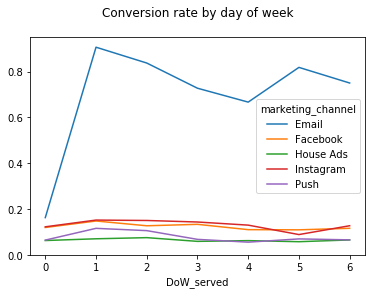

In [53]:
#Plot the Conversion rate by day of week
DoW_df.plot(kind = 'line')
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

# 3.7 House ads Conversion by Language
We can rule out the natural flucuations across the day of week by looking at the above line plot. Lets take a look at conversion rate by language overtime. Perhaps the new marketing campaign does not apply broadly across different cultures.

In [54]:
#Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

#Calculate the conversion rate by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])
print(conv_lang_channel.head())

date_served  language_displayed
2018-01-01   Arabic                1.000000
             English               0.075145
             German                0.200000
             Spanish               0.000000
2018-01-02   Arabic                0.000000
Name: user_id, dtype: float64


In [55]:
#Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level =1)) 
print(conv_lang_df.head())

language_displayed  Arabic   English    German   Spanish
date_served                                             
2018-01-01             1.0  0.075145  0.200000  0.000000
2018-01-02             0.0  0.068966  0.600000  0.000000
2018-01-03             0.0  0.083799  0.333333  0.125000
2018-01-04             0.0  0.080537  0.000000  0.214286
2018-01-05             NaN  0.118881  0.000000  0.214286


C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


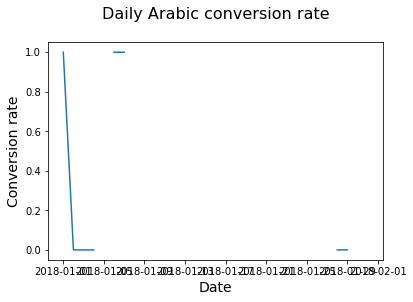

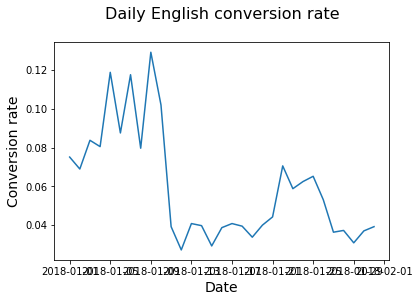

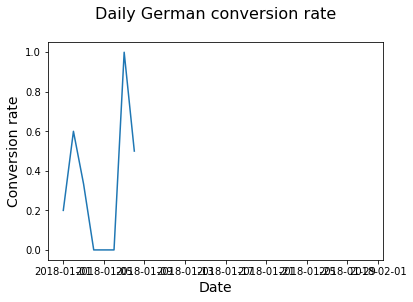

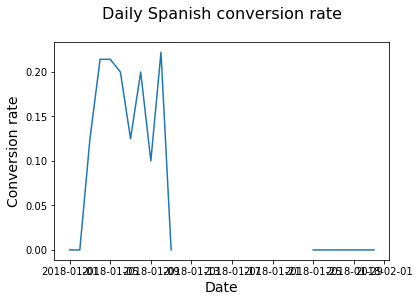

<Figure size 432x288 with 0 Axes>

In [56]:
#Use plotting function to display results
plotting_conv(conv_lang_df)

# 3.8 Creating a DataFrame for House Ads
The House ads team is concerned because they have seen their conversion rate drop suddenly in the past few weeks. In the previous steps we confirmed that conversion is down because we noticed a pattern around language preferences. Lets analyse further. 

In [57]:
#Add new column is_correct_lang to house_ads dataframe
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'], 'Yes', 'No')
display(house_ads.head())

C:\Users\viv31\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW,DoW_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0


In [58]:
#Group by date served and correct language
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['user_id'].nunique()
print(language_check.head())

date_served  is_correct_lang
2018-01-01   No                   2
             Yes                187
2018-01-02   No                   3
             Yes                216
2018-01-03   Yes                192
Name: user_id, dtype: int64


In [59]:
#Unstack the language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level = 1))
print(language_check_df.head())

is_correct_lang   No    Yes
date_served                
2018-01-01       2.0  187.0
2018-01-02       3.0  216.0
2018-01-03       NaN  192.0
2018-01-04       NaN  167.0
2018-01-05       NaN  158.0


# 3.9 Confirming House Ads error
Now that we have created a dataframe that checks whether users see ads in correct language lets calculate what the percentage of users were not being served ads in the right language and plot the results. 

In [60]:
#Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes'] / language_check_df.sum(axis=1)
print(language_check_df)

is_correct_lang    No    Yes       pct
date_served                           
2018-01-01        2.0  187.0  0.989418
2018-01-02        3.0  216.0  0.986301
2018-01-03        NaN  192.0  1.000000
2018-01-04        NaN  167.0  1.000000
2018-01-05        NaN  158.0  1.000000
2018-01-06        1.0  151.0  0.993421
2018-01-07        2.0  129.0  0.984733
2018-01-08        NaN  154.0  1.000000
2018-01-09        NaN  157.0  1.000000
2018-01-10        NaN  169.0  1.000000
2018-01-11       20.0  135.0  0.870968
2018-01-12       18.0  129.0  0.877551
2018-01-13       26.0  122.0  0.824324
2018-01-14       20.0  131.0  0.867550
2018-01-15       16.0  189.0  0.921951
2018-01-16       28.0  127.0  0.819355
2018-01-17       21.0  126.0  0.857143
2018-01-18       31.0  121.0  0.796053
2018-01-19       22.0  126.0  0.851351
2018-01-20       26.0  124.0  0.826667
2018-01-21       14.0   99.0  0.876106
2018-01-22       13.0   72.0  0.847059
2018-01-23       16.0   69.0  0.811765
2018-01-24       13.0   8

C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\viv31\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


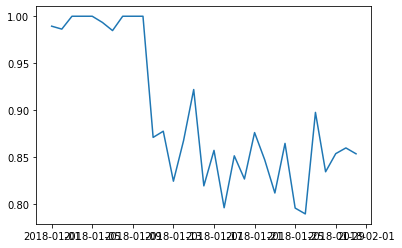

In [61]:
#Plot and show your result
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

# Above plot shows that house ads have been underperforming due to serving all ads in English rather than each user's preferred language. 

# 3.10 Setting up Conversion Indexes
Now that we have determined that language is infact the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug. 

In this step i will index non english language conversion rates against english conversion rates in the time period before the bug arose (2018-01-11)

In [62]:
#Calculate Pre error Conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])
print(lang_conv.head())

language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64


In [63]:
#Index other language Conversion rate against english
spanish_index = lang_conv['Spanish'] / lang_conv['English']
arabic_index = lang_conv['Arabic'] / lang_conv['English']
german_index = lang_conv['German'] / lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


# Before the bug arose Spanish Conversion rate is roughly 1.6 times, Arabic Conversion rate is 5 times, and German Conversion rate is 4.4 times higher than English Conversion rate

# 3.11 Analyzing user preferences
To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. 

In this step i will create a new Dataframe to perform calculations to determine the expected number of subscribers. This Dataframe will include how many users prefer each language by day. Once i have the Dataframe, i can then calculate how many subscribers i would have expected to have had the language bug not occured.

In [64]:
#Group house_ads by date and language and calculate unique and converted users
converted = house_ads.groupby(['date_served', 'language_preferred']).agg({'user_id': 'nunique', 'converted': 'sum'})
print(converted.head()) 

                                user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                 171        13
            German                    5         1
            Spanish                  11         0
2018-01-02  Arabic                    3         0


In [65]:
#Unstack converted
converted = pd.DataFrame(converted.unstack(level = 1))
print(converted.head()) 

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3  


# 3.12 Creating a Dataframe based on Indexes
Now that i have created an index to compare English conversion rates against all other languages, i will build a Dataframe that will estimate what daily conversion rates should have been if users were being served the correct language. 

Expected conversion dataframe named converted_df has been created already. It contains unique number of users and number of conversions for each language each day. 

In [66]:
#For example i can access number of spanish speakers who received house ads using 
converted[('user_id', 'Spanish')].head()

date_served
2018-01-01    11.0
2018-01-02    10.0
2018-01-03     8.0
2018-01-04    14.0
2018-01-05    14.0
Name: (user_id, Spanish), dtype: float64

In [67]:
#Create English Conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11': '2018-01-31'][('converted', 'English')]
display(converted.tail())

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate  
language_preferred Spanish                    
date_served                                   
2018-01-27               1                 4  
2018-01-28               2                 4  
2018-01-29               0                 3  
2018-01-30               2                 4  
2018-01-31               1                 4

In [68]:
#Create Expected Conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate'] * spanish_index 
converted['expected_arabic_rate'] = converted['english_conv_rate'] * arabic_index
converted['expected_german_rate'] = converted['english_conv_rate'] * german_index
display(converted.tail())

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-27               1                 4                6.7277   
2018-01-28               2                 4                6.7277   
2018-01-29               0                 3              5.045775   
2018-01-30               2                 4                6.7277   
2018-01-31               1                 4                6.7277   

                   expected_arabic_rate expected_german_rate  
language_preferred                                            
date_served                                                   
2018-01-27                    20.183099            17.940532  
2018-01-28                    20.183099            17.940532  
2018-01-29                    15.137324            13.455399  
2018-01-30                    20.183099            17.940532  
2018-01-31                    20.183099            17.940532

In [69]:
#Multiply number of users by expected Conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate'] * converted[('user_id', 'Spanish')] / 100
converted['expected_arabic_conv'] = converted['expected_arabic_rate'] * converted[('user_id', 'Arabic')] / 100
converted['expected_german_conv'] = converted['expected_german_rate'] * converted[('user_id', 'German')] / 100
display(converted.tail())

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-27               1                 4                6.7277   
2018-01-28               2                 4                6.7277   
2018-01-29               0                 3              5.045775   
2018-01-30               2                 4                6.7277   
2018-01-31               1                 4                6.7277   

                   expected_arabic_rate expected_german_rate  \
language_preferred                                             
date_served                                                    
2018-01-27                    20.183099            17.940532   
2018-01-28                    20.183099            17.940532   
2018-01-29                    15.137324            13.455399   
2018-01-30                    20.183099            17.940532   
2018-01-31                    20.183099            17.940532   

                   expected_spanish_conv expected_arabic_conv  \
language_preferred                                              
date_served                                                     
2018-01-27                      0.807324             0.605493   
2018-01-28                      1.412817             1.009155   
2018-01-29                      0.756866             1.059613   
2018-01-30                      1.210986             0.807324   
2018-01-31                      1.076432             1.412817   

                   expected_german_conv  
language_preferred                       
date_served                              
2018-01-27                     0.538216  
2018-01-28                     0.538216  
2018-01-29                     0.538216  
2018-01-30                     0.538216  
2018-01-31                     0.717621

# 3.13 Assessing bug impact
Its time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. The dataframe converted contains expected subscribers columns for Spanish, Arabic and German language speakers named expected_spanish_conv, expected_arabic_conv, expected_german_conv respectively.

In [70]:
#Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

#Sum expected subscribers for each language 
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

#Calculate how many subscribers we actually got
actual_subs = converted[('converted', 'Spanish')].sum() + converted[('converted', 'Arabic')].sum() + converted[('converted', 'German')].sum()

#Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


# We lost 32 Subscribers during the bug period

# Phase 4 Personalization A/B Test

# 4.1 A/B Testing for Marketing
A/B Testing refers to a randomized experiment which evaluates which variant performs better. In order for our tests to have meaning, we must have a clear control. The control should be something that currently exists and is running in production. Each variant in the test should have only one major change from the control, otherwise it will be impossible to parse what led to the change in your key metrics. 

Prior to running the test determine:
1. What is the desired outcome of the test ? what is your hypothesis ?
2. What is the metric we are trying to impact(i.e. page views, conversions)? 
3. Will we get enough traffic to our site to reach statistical significance and make decison in a timely manner? 

# 4.2 Personalized email test
The focus of this step will be the A/B test that was run where half the emails were generic upsells to our product, while the other half contained personalized messaging around individual usage of our site. Before we begin analyzing the results, we will check to ensure users were allocated equally to the test and control groups.

variant
control            270
personalization    284
Name: user_id, dtype: int64


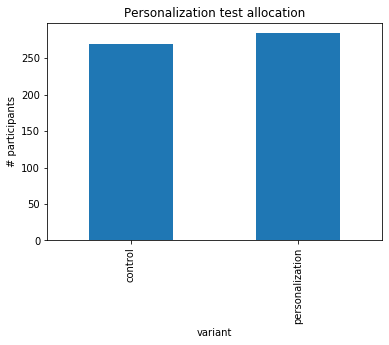

In [71]:
#Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

#Group the email dataframe by variant
alloc = email.groupby(['variant'])['user_id'].nunique()
print(alloc)

#Plot a bar chart of the test allocation
alloc.plot(kind = 'bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

# 4.3 Comparing conversion rates
Now that we know allocation rate is relatively even lets look at the conversion rate for the control and personalization. Since we chose conversion rate as a key metric for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. Measuring the difference between the control and the personalization treatment is the most important part of evaluating the success of an A/B test.

I will be using email dataframe which contains only rows from the marketing dataframe where marketing channel is Email.

In [72]:
#Group email dataframe by user_id and variant
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
print(subscribers.head())

user_id     variant        
a100000526  personalization     True
a100000530  personalization     True
a100000534  personalization    False
a100000538  personalization     True
a100000542  personalization     True
Name: converted, dtype: bool


In [73]:
#Unstack subscribers
subscribers_df = pd.DataFrame(subscribers.unstack(level =1))
print(subscribers_df.head()) 

variant    control personalization
user_id                           
a100000526     NaN            True
a100000530     NaN            True
a100000534     NaN           False
a100000538     NaN            True
a100000542     NaN            True


In [74]:
#Drop the missing values from control column
control = subscribers_df['control'].dropna()

#Drop the missing values from personalization column
personalization = subscribers_df['personalization'].dropna()

print("Control conversion rate:", np.mean(control))
print("Personalization conversion rate:", np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


# We can see that Personalization converted users at a higher rate than control.

# 4.4 Creating a Lift Function
Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control.

The formula for the lift = Personalization Treatment conversion rate - Control conversion rate / Control conversion rate

The result is the percentage difference between control and Personalization treatment 

In this step i will create a function to automate the process of calculating lift.

In [75]:
from scipy.stats import ttest_ind


def lift(a,b):
    # Calculate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean - a_mean) / a_mean 
    
    return str(round(lift*100, 2)) + '%'

#Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In [76]:
#Run a t test 
from scipy.stats import ttest_ind
t = ttest_ind(control, personalization)
print(t) 

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.0064514878446941745)


# P value less than 0.05 is typically considered statistically significant at 95% significance level. Since the P value here is less than 0.05 we can be confident that the difference in conversion rates is statistically significant

# 4.5 Building an A/B test segmenting Function
In the previous step we observed that Personalization experiment is highly statistically significant. However when running experiments, it is important to check how the new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others. 

Since we want to segment our data multiple times, we will build a function ab_segmentation() that analyzes the impact of our a/b tests on segments of data that we can reuse each time we want to conduct this kind of analysis. 

Segmentation function will take in a column name and run through each unique value in that column calculating lift and statistical significance.

In [77]:
def ab_segmentation(segment):
    # Build a for loop for each sub segment in marketing
    for subsegment in np.unique(marketing[segment].values):
        print(subsegment) 
        
        # Limit marketing to email and subsegment 
        email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]
        
        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level = 1))
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()
        
        print("lift:", lift(control, personalization))
        print("t-statistic:", ttest_ind(control, personalization))

# 4.6 Using ab segmentation Function 
Its time to test ab segmentation function. We will run through two segments in our data that may be relevant to assessing the impact of our test. When using ab segmentation function remember to input the column name in quotes (i.e. 'language_displayed'). 

In [78]:
# Use ab segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001)
English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815)
German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678)
Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524)


In [79]:
# Use ab segmentation on age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226)
19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134)
24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867335)
30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137)
36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.017975686009788286)
45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196)
55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435)


# 4.7 Going by the above results
Personalization is extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy. 

# Quick recap and Conclusion
1. In this project i analyzed marketing campaign from start to finish. I began importing the dataset and used head(), info(), and describe() methods to assess the contents and quality of dataset. 
2. Preprocessing - Practiced feature engineering by creating a new columns and corrected an errors in the data
3. Marketing Metrics - I looked at high level metrics like Conversion and Retention Rates. After i had the handle on marketing metrics, i practiced user segmentation for ex: looking at how different marketing channels reach different age groups 
4. Dip in Conversion Rate - I dealt with one of the most common challenges in marketing. Something went wrong in the campaign and it was my job to identify the problem and assess the impact of the mistake. Successfully found the cause for the dip in conversion rate which was a language mismatch. 
5. A/B Test - Finally analyzed an A/B test. Learned how to determing statistical significance and the importance of segmentation in A/B tests to understand the true impact of the change. I found that while the test was a success overall, personalization was not appreciated in certain regions and by certain age groups. 